In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import r2_score
import pickle

In [2]:
df = pd.read_csv("SeoulBikeData.csv",encoding='latin-1')
df.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
df.shape

(8760, 14)

## Data Visualization (Relationship between Features and Target)

### Effect of Hour on Bikes Rented

Text(0.5, 1.0, 'Effect of Hour')

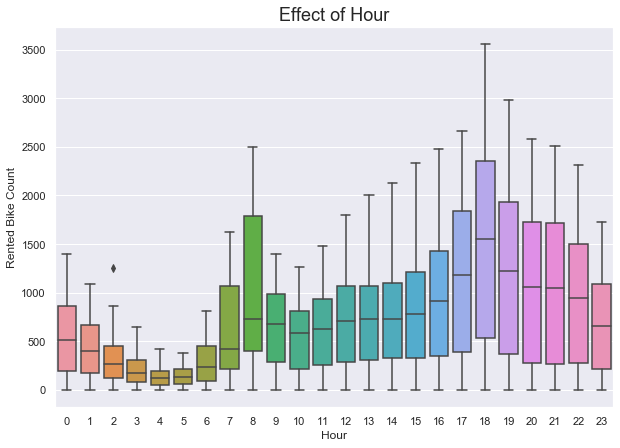

In [4]:
sns.set(rc={"figure.figsize":(10,7)})
sns.boxplot(x="Hour",y="Rented Bike Count",data=df).set_title("Effect of Hour",fontsize=18)

### Influence of Temperature on the rate of bikes rented 

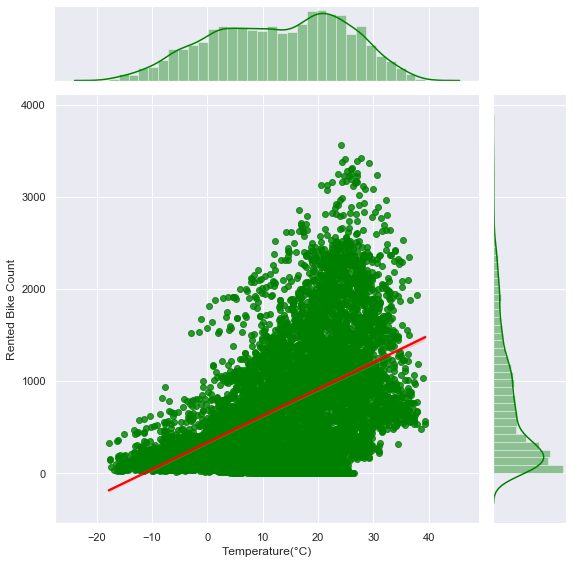

In [5]:
sns.jointplot(x="Temperature(°C)",y="Rented Bike Count",data=df,kind='reg',color="green",height=8,joint_kws={'line_kws':{'color':'red'}})


### Relation of number of bikes rented with Humidity, Wind speed and Visibility

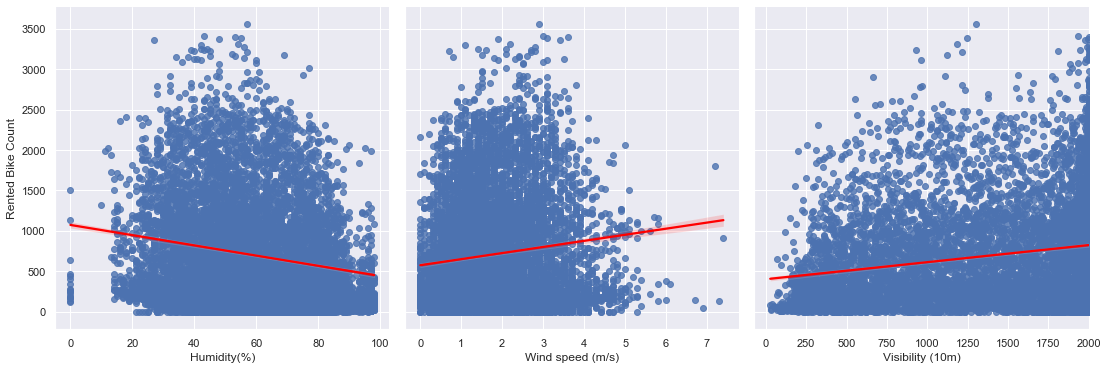

In [6]:
sns.pairplot(df,x_vars=["Humidity(%)","Wind speed (m/s)","Visibility (10m)"], y_vars=["Rented Bike Count"],kind="reg",plot_kws={'line_kws':{'color':'red'}},height=5)

### Effect of Solar Radiation, Rainfall and Snowfall on Rented Bikes

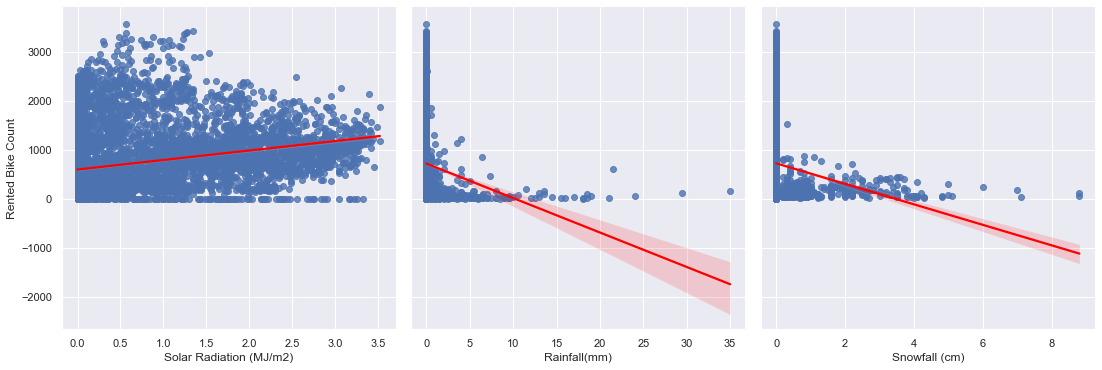

In [7]:
sns.pairplot(df,x_vars=["Solar Radiation (MJ/m2)","Rainfall(mm)","Snowfall (cm)"], y_vars=["Rented Bike Count"],kind="reg",plot_kws={'line_kws':{'color':'red'}},height=5)

### Relationship of Rented Bikes with Season and Holiday

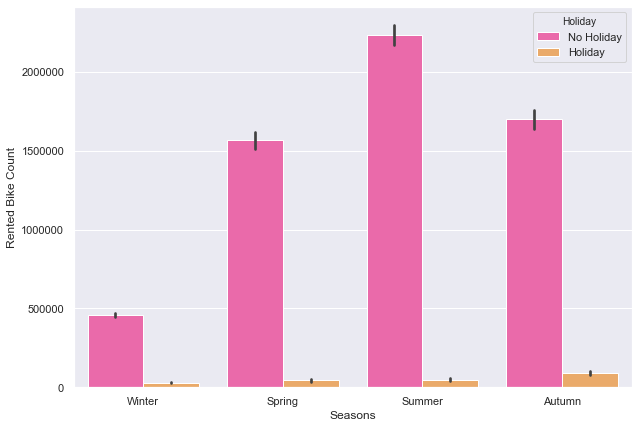

In [8]:
sns.barplot(x="Seasons",y="Rented Bike Count",data=df,palette="spring",hue="Holiday",estimator=sum)

## Machine Learning Models

#### Feature Extraction

In [9]:
df["Date"] = pd.to_datetime(df["Date"])

In [10]:
df["Month"] = df["Date"].dt.month

In [11]:
df["Weekday"] = df["Date"].dt.dayofweek

In [12]:
season_dict = {"Spring":0,"Summer":1,"Autumn":2,"Winter":3}
holiday_dict = {"No Holiday":0,"Holiday":1}
function_dict = {"Yes":1,"No":0}

In [13]:
df["Seasons"] = df["Seasons"].map(season_dict)
df["Holiday"] = df["Holiday"].map(holiday_dict)
df["Functioning Day"] = df["Functioning Day"].map(function_dict)

In [14]:
features = df.drop(["Rented Bike Count","Date"],axis=1)
labels = df["Rented Bike Count"]

In [15]:
features

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Weekday
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,0,1,1,3
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,0,1,1,3
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,0,1,1,3
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,0,1,1,3
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,2,0,1,11,4
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,2,0,1,11,4
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,2,0,1,11,4
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,2,0,1,11,4


In [16]:
features.columns

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'Weekday'],
      dtype='object')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features.values,labels.values,test_size=0.1,random_state=0)

In [18]:
print("Training Data Size :",X_train.shape[0])
print("Test Data Size :",X_test.shape[0])

Training Data Size : 7884
Test Data Size : 876


## Normalization

In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [20]:
sc.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [21]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

### Least Squares Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model_1 = LinearRegression()
model_1.fit(X_train_sc,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
pred_1 = model_1.predict(X_test_sc)
least_squares_score = r2_score(y_test,pred_1)
print("Lease Squares Score :",least_squares_score)

Lease Squares Score : 0.5156853869262186


### Lasso Regression with GridSearch for Parameter Optimization

In [25]:
from sklearn.linear_model import Lasso

In [26]:
pram_1 = {'alpha':[0.01,0.02,0.05,0.1,1],'max_iter':[1000,3000,5000]}
model_2 = Lasso()
clf_2 = GridSearchCV(model_2,pram_1)

In [27]:
clf_2.fit(X_train_sc,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.02, 0.05, 0.1, 1],
                         'max_iter': [1000, 3000, 5000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [28]:
clf_2.best_params_

{'alpha': 0.05, 'max_iter': 1000}

In [29]:
model_2=clf_2.best_estimator_

In [30]:
pred_2 = model_2.predict(X_test_sc)
lasso_score = r2_score(y_test,pred_2)
print("Lasso Regression Score :",lasso_score)

Lasso Regression Score : 0.5154076096330056


### Polynomial and Ridge Regression with GridSearch for Parameter Optimization

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [32]:
poly = PolynomialFeatures(degree=2)
features_poly = poly.fit_transform(features.values)
X_trainp, X_testp, y_train, y_test = train_test_split(features_poly,labels.values,test_size=0.1,random_state=0)

In [33]:
pram_2 = {'alpha':[10,50,75,100,200]}
model_3 = Ridge()
clf_3 = GridSearchCV(model_3,pram_2)

In [34]:
clf_3.fit(X_trainp,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [10, 50, 75, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
clf_3.best_params_

{'alpha': 75}

In [36]:
model_3=clf_3.best_estimator_

In [37]:
pred_3 = model_3.predict(X_testp)
ridge_score = r2_score(y_test,pred_3)
print("Ridge Regression Score :",ridge_score)

Ridge Regression Score : 0.6771534930531571


In [38]:
model_save = open("model.dat","wb")
pickle.dump(model_3,model_save)
model_save.close()

In [41]:
poly_save = open("poly.dat","wb")
pickle.dump(poly,poly_save)
poly_save.close()

Text(0.5, 1.0, 'Performanc Comparison')

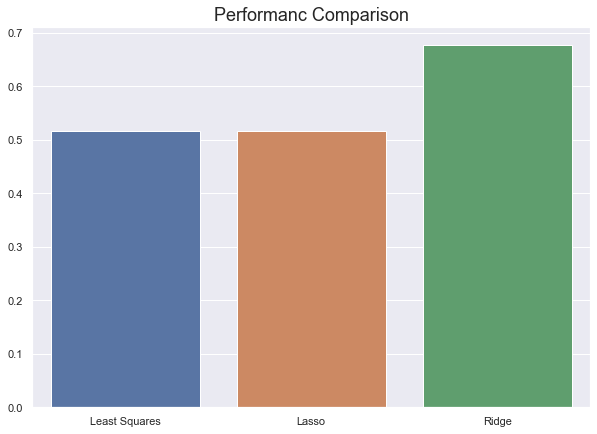

In [42]:
sns.barplot(["Least Squares","Lasso","Ridge"],[least_squares_score,least_squares_score,ridge_score]).set_title("Performanc Comparison",fontsize=18)